In [105]:
# Importing all lobraries
# Runge Kutta(RK4) method can be used instead of scipy.integrate
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [106]:
# Decoupled Schrodinger eqn 
def schrod_eqn(y,r,L,E):
    psi = np.empty(2)
    psi[1] = y[0]*( (L*(L+1))/(r**2) - 2.0/r - E)
    psi[0] = y[1]
    return psi

# Normalizing psi values to [-1,1]
def normalize(psi):
    norm = max(psi)
    return psi*(1/norm)

# Checking number of zero crossings to get node value
def find_roots(psi):
    sign_of_psi = np.signbit(psi)
    detect_region_crossing = np.diff(sign_of_psi)
    roots = np.where(detect_region_crossing)[0] # [1] has info about dtype 
    return roots

# Using binary search to find the possible energy values in the search space
def energy_vals(E_minus,E_plus,nodes,psi0,x,L):
    tolerance = 1e-10
    ep = E_plus
    em = E_minus
    psi = [1]
    while( abs(ep-em)>tolerance or abs(psi[-1])>1e-3 ):
        e = (ep+em)/2.0
        psi = integrate.odeint(schrod_eqn,psi0,x,args=(L,e))[:,0]
        nodes_ist = len(find_roots(psi))-1
        #print(ep,em,nodes_ist)
        if nodes_ist > nodes+1:
            ep = e
            continue
        if nodes_ist < nodes-1:
            em = e
            continue
        if nodes_ist%2 == 0 :
            if psi[len(psi)-1] <= 0.0 :
                ep = e
            else:
                em = e
        elif nodes_ist > 0 :
            if psi[len(psi)-1] <= 0.0 :
                em = e
            else:
                ep = e
        elif nodes_ist < 0 :
            em = e
            
    return (ep+em)/2.0

# Runge Kutta method for integration
def rk4(fnc,z0,x,m,V,E):
    n = len(x)
    z = np.array([z0]*n)
    for i in range(n-1):
        h = (x[i+1]-x[i])*0.5
        k1 = 0.5*h*fnc(z[i],x[i],m,V[i],E)
        k2 = 0.5*h*fnc(z[i]+k1,x[i]+h,m,V[i],E)
        k3 = 0.5*h*fnc(z[i]+k2,x[i]+h,m,V[i],E)
        k4 = 0.5*h*fnc(z[i]+k3,x[i],m,V[i],E)
        z[i+1] = z[i] + (k1 + 2.0*(k2+k3) + k4)/3.0
    return z

# Configuring the system
def h_atom(psi0,N,L,x):
    nodes = N-L-1
    E_plus = 10000.0
    E_minus = -10.0
    E = energy_vals(E_minus,E_plus,nodes+1,psi0,x,L)
    alpha = L*(L+1)/2.0
    delta = np.sqrt(1-E*alpha)
    x1 = min((1+delta)/E,(1-delta)/E)
    x2 = max((1+delta)/E,(1-delta)/E)
    return E,x1,x2

Stable state level: 1
Orbital state level: 0
Energy: -0.9999997127943416


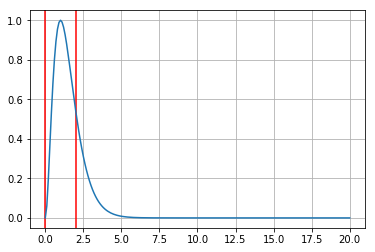

Stable state level: 2
Orbital state level: 0
Energy: -0.24997419649690045


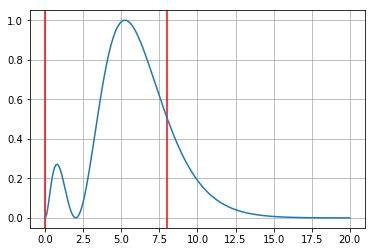

Stable state level: 3
Orbital state level: 0
Energy: -0.09983607252973314


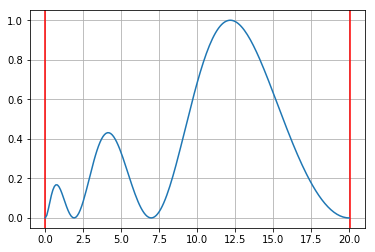

Unstable state level: 4
Orbital state level: 0
Energy: 0.03342632463226636
Unstable state level: 5
Orbital state level: 0
Energy: 0.2257555203808792


In [114]:
# N stands for principle quantum number which decides number of nodes.
# L stands for orbital quantum number, changing L will result in few graphs whose values beyond zero potential is abnormal which can be discarded. 
# This happens beacuse you're trying to find the probability function at 1p orbital or orbitals in unstable states which do not exist in the first place. 
# The code by default only finds out all possible states of hydrogen atom for L=0.
# The highest peak in the graph corresponds to maximum probability thus the x-value at that peak corresponds to the distance from the center of the atom.
# x1,x2 represents the points of zero potential given by the wave function.

N = 5
L = 0 # Change this to find different orbital wave functions. 
h = 1.0/10.0 # Integration step size
x = np.arange(1e-7,20.0+h,h) # Integration limit
psi0 = np.asarray([0.0,1.0]) # Initial value of decoupled psi and psi'
nodes = np.arange(1,N+1,1)

for node in nodes:
    # Removing the possibility finding psi square of 1p orbital
    if L>=node:
        continue
    
    # Finding the best energy corresponding to number of nodes in the graph
    E,x1,x2 = h_atom(psi0,node,0,x)
    
    # Finding the wave function by integrating schrodinger equation for the value of energy found above 
    psi = integrate.odeint(schrod_eqn,psi0,x,args=(L,E))[:,0]
    
    # Plotting relevant graphs and stats
    state = 'Stable' if E<0 else 'Unstable'
    print(state+' state level: '+str(node))
    print('Orbital state level: '+str(L))
    print('Energy: '+str(E))
    if E<0:
        plt.axvline(x=-x1,color='r')
        plt.axvline(x=x2,color='r')
        plt.plot(x,normalize(psi**2))
        plt.grid()
        plt.show()